<a href="https://colab.research.google.com/github/avantikabalaji2002/FinalYearProject/blob/main/Stock_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [31]:
data=pd.read_csv("/content/HealthConDis.csv",encoding='unicode_escape')

In [ ]:
data=pd.read_csv("/content/drive/MyDrive/final_year_project/all_stocks_5yr.csv")

In [32]:
data.columns

Index(['Date', 'Open Price', 'High Price', 'Low Price', 'Close Price', 'WAP',
       'No.of Shares', 'No. of Trades', 'Total Turnover (Rs.)',
       'Deliverable Quantity', '% Deli. Qty to Traded Qty', 'Spread High-Low',
       'Spread Close-Open', 'Sector', 'Co Name'],
      dtype='object')

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249770 entries, 0 to 249769
Data columns (total 15 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Date                       249770 non-null  object 
 1   Open Price                 249770 non-null  float64
 2   High Price                 249770 non-null  float64
 3   Low Price                  249770 non-null  float64
 4   Close Price                249770 non-null  float64
 5   WAP                        249770 non-null  float64
 6   No.of Shares               249770 non-null  int64  
 7   No. of Trades              249770 non-null  int64  
 8   Total Turnover (Rs.)       249770 non-null  int64  
 9   Deliverable Quantity       249043 non-null  float64
 10  % Deli. Qty to Traded Qty  249043 non-null  float64
 11  Spread High-Low            249770 non-null  float64
 12  Spread Close-Open          249770 non-null  float64
 13  Sector                     24

In [34]:
data=data.dropna()

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 249043 entries, 0 to 249769
Data columns (total 15 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Date                       249043 non-null  object 
 1   Open Price                 249043 non-null  float64
 2   High Price                 249043 non-null  float64
 3   Low Price                  249043 non-null  float64
 4   Close Price                249043 non-null  float64
 5   WAP                        249043 non-null  float64
 6   No.of Shares               249043 non-null  int64  
 7   No. of Trades              249043 non-null  int64  
 8   Total Turnover (Rs.)       249043 non-null  int64  
 9   Deliverable Quantity       249043 non-null  float64
 10  % Deli. Qty to Traded Qty  249043 non-null  float64
 11  Spread High-Low            249043 non-null  float64
 12  Spread Close-Open          249043 non-null  float64
 13  Sector                     24

In [36]:
data['Co Name'].unique()

array(['CIPLA', 'SUN PHARMA', 'DIVIS LABS', 'DR REDDYS',
       'Zydus Lifesciences Ltd', 'Torrent Pharma', 'Lupin Ltd',
       'Aurobindo Pharma', 'Abbott India Ltd', 'Alkem Lab',
       'GLAXOSMITHKLINE PHARMACEUTICALS LTD.', 'IPCA Laboratories Ltd',
       'GLENMARK PHARMACEUTICALS LTD', 'AJANTA PHARMA LTD',
       'Laurus Labs Ltd', 'J B Chemicals', 'PFIZER LTD',
       'Sanofi India Ltd', 'Natco Pharma Ltd', 'Alembic  Pharma',
       'APOLLO HOSPITALS ENTERPRISE LTD', 'Dr.Lal Pathlabs Ltd',
       'Fortis Health Care Ltd', 'AsterDm Health Care Ltd',
       'Narayana Hrudayalaya Ltd\xa0', 'Thyrocare Technologies Ltd\xa0',
       'Health Care Global Enterprises ', 'Shalby Ltd',
       'Kovai Medical Centre', 'INDRAPRASTHA MEDICAL CORP.LTD.',
       'KMC SPECIALITY HOSPITALS (INDIA) LTD.',
       'DR.AGARWALS EYE HOSPITAL LTD', 'Fortis Malar Hospitals Limited',
       'Tejnaksh Healthcare Ltd', 'TRANSGENE BIOTEK LTD.',
       'N G Industries Ltd', 'CHOKSI LABORATORIES LTD.\xa0',
    

In [37]:
data['Co Name'].nunique()

210

In [38]:
data['Date'].unique()

array(['31-Mar-23', '29-Mar-23', '28-Mar-23', ..., '5-Mar-18', '1-Mar-18',
       ' '], dtype=object)

In [39]:
data[data['Date']=='2018-11-08']['Co Name']

Series([], Name: Co Name, dtype: object)

<ipython-input-12-c1d1dfc50329>:60: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['Date'] = pd.to_datetime(data['date'])


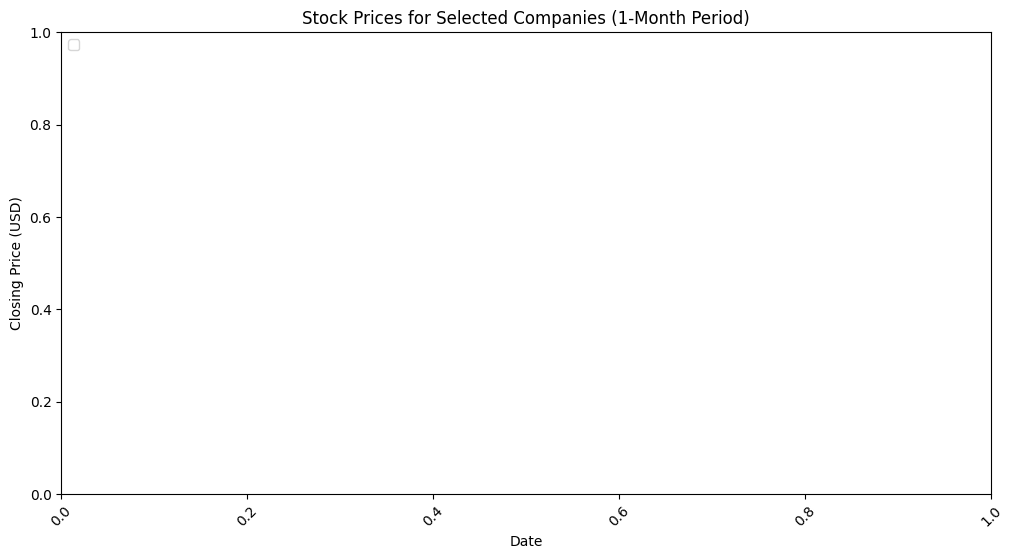

In [ ]:
# List of specified companies
companies_to_plot = ['AAL', 'AAPL', 'AAP', 'ABBV', 'ABC', 'ABT', 'ACN', 'ADBE', 'ADI',
       'ADM', 'ADP', 'ADSK', 'ADS', 'AEE', 'AEP', 'AES', 'AET', 'AFL',
       'AGN', 'AIG', 'AIV', 'AIZ', 'AJG', 'AKAM', 'ALB', 'ALGN', 'ALK',
       'ALLE', 'ALL', 'ALXN', 'AMAT', 'AMD', 'AME', 'AMGN', 'AMG', 'AMP',
       'AMT', 'AMZN', 'ANDV', 'ANSS', 'ANTM', 'AON', 'AOS', 'APA', 'APC',
       'APD', 'APH', 'APTV', 'ARE', 'ARNC', 'ATVI', 'AVB', 'AVGO', 'AVY',
       'AWK', 'AXP', 'AYI', 'AZO', 'A', 'BAC', 'BAX', 'BA', 'BBT', 'BBY',
       'BDX', 'BEN', 'BF.B', 'BHF', 'BHGE', 'BIIB', 'BK', 'BLK', 'BLL',
       'BMY', 'BRK.B', 'BSX', 'BWA', 'BXP', 'CAG', 'CAH', 'CAT', 'CA',
       'CBG', 'CBOE', 'CBS', 'CB', 'CCI', 'CCL', 'CDNS', 'CELG', 'CERN',
       'CFG', 'CF', 'CHD', 'CHK', 'CHRW', 'CHTR', 'CINF', 'CI', 'CLX',
       'CL', 'CMA', 'CMCSA', 'CME', 'CMG', 'CMI', 'CMS', 'CNC', 'CNP',
       'COF', 'COG', 'COL', 'COO', 'COP', 'COST', 'COTY', 'CPB', 'CRM',
       'CSCO', 'CSRA', 'CSX', 'CTAS', 'CTL', 'CTSH', 'CTXS', 'CVS', 'CVX',
       'CXO', 'C', 'DAL', 'DE', 'DFS', 'DGX', 'DG', 'DHI', 'DHR', 'DISCA',
       'DISCK', 'DISH', 'DIS', 'DLR', 'DLTR', 'DOV', 'DPS', 'DRE', 'DRI',
       'DTE', 'DUK', 'DVA', 'DVN', 'DWDP', 'DXC', 'D', 'EA', 'EBAY',
       'ECL', 'ED', 'EFX', 'EIX', 'EL', 'EMN', 'EMR', 'EOG', 'EQIX',
       'EQR', 'EQT', 'ESRX', 'ESS', 'ES', 'ETFC', 'ETN', 'ETR', 'EVHC',
       'EW', 'EXC', 'EXPD', 'EXPE', 'EXR', 'FAST', 'FBHS', 'FB', 'FCX',
       'FDX', 'FE', 'FFIV', 'FISV', 'FIS', 'FITB', 'FLIR', 'FLR', 'FLS',
       'FL', 'FMC', 'FOXA', 'FOX', 'FRT', 'FTI', 'FTV', 'F', 'GD', 'GE',
       'GGP', 'GILD', 'GIS', 'GLW', 'GM', 'GOOGL', 'GOOG', 'GPC', 'GPN',
       'GPS', 'GRMN', 'GS', 'GT', 'GWW', 'HAL', 'HAS', 'HBAN', 'HBI',
       'HCA', 'HCN', 'HCP', 'HD', 'HES', 'HIG', 'HII', 'HLT', 'HOG',
       'HOLX', 'HON', 'HPE', 'HPQ', 'HP', 'HRB', 'HRL', 'HRS', 'HSIC',
       'HST', 'HSY', 'HUM', 'IBM', 'ICE', 'IDXX', 'IFF', 'ILMN', 'INCY',
       'INFO', 'INTC', 'INTU', 'IPG', 'IP', 'IQV', 'IRM', 'IR', 'ISRG',
       'ITW', 'IT', 'IVZ', 'JBHT', 'JCI', 'JEC', 'JNJ', 'JNPR', 'JPM',
       'JWN', 'KEY', 'KHC', 'KIM', 'KLAC', 'KMB', 'KMI', 'KMX', 'KORS',
       'KO', 'KR', 'KSS', 'KSU', 'K', 'LB', 'LEG', 'LEN', 'LH', 'LKQ',
       'LLL', 'LLY', 'LMT', 'LNC', 'LNT', 'LOW', 'LRCX', 'LUK', 'LUV',
       'LYB', 'L', 'MAA', 'MAC', 'MAR', 'MAS', 'MAT', 'MA', 'MCD', 'MCHP',
       'MCK', 'MCO', 'MDLZ', 'MDT', 'MET', 'MGM', 'MHK', 'MKC', 'MLM',
       'MMC', 'MMM', 'MNST', 'MON', 'MOS', 'MO', 'MPC', 'MRK', 'MRO',
       'MSFT', 'MSI', 'MS', 'MTB', 'MTD', 'MU', 'MYL', 'M', 'NAVI', 'NBL',
       'NCLH', 'NDAQ', 'NEE', 'NEM', 'NFLX', 'NFX', 'NI', 'NKE', 'NLSN',
       'NOC', 'NOV', 'NRG', 'NSC', 'NTAP', 'NTRS', 'NUE', 'NVDA', 'NWL',
       'NWSA', 'NWS', 'OKE', 'OMC', 'ORCL', 'ORLY', 'OXY', 'O', 'PAYX',
       'PBCT', 'PCAR', 'PCG', 'PCLN', 'PDCO', 'PEG', 'PEP', 'PFE', 'PFG',
       'PGR', 'PG', 'PHM', 'PH', 'PKG', 'PKI', 'PLD', 'PM', 'PNC', 'PNR',
       'PNW', 'PPG', 'PPL', 'PRGO', 'PRU', 'PSA', 'PSX', 'PVH', 'PWR',
       'PXD', 'PX', 'PYPL', 'QCOM', 'QRVO', 'RCL', 'REGN', 'REG', 'RE',
       'RF', 'RHI', 'RHT', 'RJF', 'RL', 'RMD', 'ROK', 'ROP', 'ROST',
       'RRC', 'RSG', 'RTN', 'SBAC', 'SBUX', 'SCG', 'SCHW', 'SEE', 'SHW',
       'SIG', 'SJM', 'SLB', 'SLG', 'SNA', 'SNI', 'SNPS', 'SO', 'SPGI',
       'SPG', 'SRCL', 'SRE', 'STI', 'STT', 'STX', 'STZ', 'SWKS', 'SWK',
       'SYF', 'SYK', 'SYMC', 'SYY', 'TAP', 'TDG', 'TEL', 'TGT', 'TIF',
       'TJX', 'TMK', 'TMO', 'TPR', 'TRIP', 'TROW', 'TRV', 'TSCO', 'TSN',
       'TSS', 'TWX', 'TXN', 'TXT', 'T', 'UAA', 'UAL', 'UA', 'UDR', 'UHS',
       'ULTA', 'UNH', 'UNM', 'UNP', 'UPS', 'URI', 'USB', 'UTX', 'VAR',
       'VFC', 'VIAB', 'VLO', 'VMC', 'VNO', 'VRSK', 'VRSN', 'VRTX', 'VTR',
       'VZ', 'V', 'WAT', 'WBA', 'WDC', 'WEC', 'WFC', 'WHR', 'WLTW', 'WMB',
       'WMT', 'WM', 'WRK', 'WU', 'WYNN', 'WYN', 'WY', 'XEC', 'XEL',
       'XLNX', 'XL', 'XOM', 'XRAY', 'XRX', 'XYL', 'YUM', 'ZBH', 'ZION',
       'ZTS']

# Convert the 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['date'])

# Define the time period (e.g., 1 month)
start_date = '2013-02-08'
end_date = '2013-12-31'  # Adjust the end date as needed

# Filter data for the specified time period
filtered_data = data[(data['date'] >= start_date) & (data['date'] <= end_date)]

# Create a single visualization for comparative analysis
plt.figure(figsize=(12, 6))
plt.title(f"Stock Prices for Selected Companies (1-Month Period)")
for company in companies_to_plot:
    subset = filtered_data[filtered_data['Name'] == company]
    sns.lineplot(x='date', y='close', data=subset, label=company)

plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend(loc='upper left')
plt.show()


In [22]:

# List of specified companies
companies_to_plot = ['AAL', 'AAPL', 'AAP', 'ABBV', 'ABC', 'ABT', 'ACN', 'ADBE', 'ADI',
       'ADM', 'ADP', 'ADSK', 'ADS', 'AEE', 'AEP', 'AES', 'AET', 'AFL',
       'AGN', 'AIG', 'AIV', 'AIZ', 'AJG', 'AKAM', 'ALB', 'ALGN', 'ALK',
       'ALLE', 'ALL', 'ALXN', 'AMAT', 'AMD', 'AME', 'AMGN', 'AMG', 'AMP',
       'AMT', 'AMZN', 'ANDV', 'ANSS', 'ANTM', 'AON', 'AOS', 'APA', 'APC',
       'APD', 'APH', 'APTV', 'ARE', 'ARNC', 'ATVI', 'AVB', 'AVGO', 'AVY',
       'AWK', 'AXP', 'AYI', 'AZO', 'A', 'BAC', 'BAX', 'BA', 'BBT', 'BBY',
       'BDX', 'BEN', 'BF.B', 'BHF', 'BHGE', 'BIIB', 'BK', 'BLK', 'BLL',
       'BMY', 'BRK.B', 'BSX', 'BWA', 'BXP', 'CAG', 'CAH', 'CAT', 'CA',
       'CBG', 'CBOE', 'CBS', 'CB', 'CCI', 'CCL', 'CDNS', 'CELG', 'CERN',
       'CFG', 'CF', 'CHD', 'CHK', 'CHRW', 'CHTR', 'CINF', 'CI', 'CLX',
       'CL', 'CMA', 'CMCSA', 'CME', 'CMG', 'CMI', 'CMS', 'CNC', 'CNP',
       'COF', 'COG', 'COL', 'COO', 'COP', 'COST', 'COTY', 'CPB', 'CRM',
       'CSCO', 'CSRA', 'CSX', 'CTAS', 'CTL', 'CTSH', 'CTXS', 'CVS', 'CVX',
       'CXO', 'C', 'DAL', 'DE', 'DFS', 'DGX', 'DG', 'DHI', 'DHR', 'DISCA',
       'DISCK', 'DISH', 'DIS', 'DLR', 'DLTR', 'DOV', 'DPS', 'DRE', 'DRI',
       'DTE', 'DUK', 'DVA', 'DVN', 'DWDP', 'DXC', 'D', 'EA', 'EBAY',
       'ECL', 'ED', 'EFX', 'EIX', 'EL', 'EMN', 'EMR', 'EOG', 'EQIX',
       'EQR', 'EQT', 'ESRX', 'ESS', 'ES', 'ETFC', 'ETN', 'ETR', 'EVHC',
       'EW', 'EXC', 'EXPD', 'EXPE', 'EXR', 'FAST', 'FBHS', 'FB', 'FCX',
       'FDX', 'FE', 'FFIV', 'FISV', 'FIS', 'FITB', 'FLIR', 'FLR', 'FLS',
       'FL', 'FMC', 'FOXA', 'FOX', 'FRT', 'FTI', 'FTV', 'F', 'GD', 'GE',
       'GGP', 'GILD', 'GIS', 'GLW', 'GM', 'GOOGL', 'GOOG', 'GPC', 'GPN',
       'GPS', 'GRMN', 'GS', 'GT', 'GWW', 'HAL', 'HAS', 'HBAN', 'HBI',
       'HCA', 'HCN', 'HCP', 'HD', 'HES', 'HIG', 'HII', 'HLT', 'HOG',
       'HOLX', 'HON', 'HPE', 'HPQ', 'HP', 'HRB', 'HRL', 'HRS', 'HSIC',
       'HST', 'HSY', 'HUM', 'IBM', 'ICE', 'IDXX', 'IFF', 'ILMN', 'INCY',
       'INFO', 'INTC', 'INTU', 'IPG', 'IP', 'IQV', 'IRM', 'IR', 'ISRG',
       'ITW', 'IT', 'IVZ', 'JBHT', 'JCI', 'JEC', 'JNJ', 'JNPR', 'JPM',
       'JWN', 'KEY', 'KHC', 'KIM', 'KLAC', 'KMB', 'KMI', 'KMX', 'KORS',
       'KO', 'KR', 'KSS', 'KSU', 'K', 'LB', 'LEG', 'LEN', 'LH', 'LKQ',
       'LLL', 'LLY', 'LMT', 'LNC', 'LNT', 'LOW', 'LRCX', 'LUK', 'LUV',
       'LYB', 'L', 'MAA', 'MAC', 'MAR', 'MAS', 'MAT', 'MA', 'MCD', 'MCHP',
       'MCK', 'MCO', 'MDLZ', 'MDT', 'MET', 'MGM', 'MHK', 'MKC', 'MLM',
       'MMC', 'MMM', 'MNST', 'MON', 'MOS', 'MO', 'MPC', 'MRK', 'MRO',
       'MSFT', 'MSI', 'MS', 'MTB', 'MTD', 'MU', 'MYL', 'M', 'NAVI', 'NBL',
       'NCLH', 'NDAQ', 'NEE', 'NEM', 'NFLX', 'NFX', 'NI', 'NKE', 'NLSN',
       'NOC', 'NOV', 'NRG', 'NSC', 'NTAP', 'NTRS', 'NUE', 'NVDA', 'NWL',
       'NWSA', 'NWS', 'OKE', 'OMC', 'ORCL', 'ORLY', 'OXY', 'O', 'PAYX',
       'PBCT', 'PCAR', 'PCG', 'PCLN', 'PDCO', 'PEG', 'PEP', 'PFE', 'PFG',
       'PGR', 'PG', 'PHM', 'PH', 'PKG', 'PKI', 'PLD', 'PM', 'PNC', 'PNR',
       'PNW', 'PPG', 'PPL', 'PRGO', 'PRU', 'PSA', 'PSX', 'PVH', 'PWR',
       'PXD', 'PX', 'PYPL', 'QCOM', 'QRVO', 'RCL', 'REGN', 'REG', 'RE',
       'RF', 'RHI', 'RHT', 'RJF', 'RL', 'RMD', 'ROK', 'ROP', 'ROST',
       'RRC', 'RSG', 'RTN', 'SBAC', 'SBUX', 'SCG', 'SCHW', 'SEE', 'SHW',
       'SIG', 'SJM', 'SLB', 'SLG', 'SNA', 'SNI', 'SNPS', 'SO', 'SPGI',
       'SPG', 'SRCL', 'SRE', 'STI', 'STT', 'STX', 'STZ', 'SWKS', 'SWK',
       'SYF', 'SYK', 'SYMC', 'SYY', 'TAP', 'TDG', 'TEL', 'TGT', 'TIF',
       'TJX', 'TMK', 'TMO', 'TPR', 'TRIP', 'TROW', 'TRV', 'TSCO', 'TSN',
       'TSS', 'TWX', 'TXN', 'TXT', 'T', 'UAA', 'UAL', 'UA', 'UDR', 'UHS',
       'ULTA', 'UNH', 'UNM', 'UNP', 'UPS', 'URI', 'USB', 'UTX', 'VAR',
       'VFC', 'VIAB', 'VLO', 'VMC', 'VNO', 'VRSK', 'VRSN', 'VRTX', 'VTR',
       'VZ', 'V', 'WAT', 'WBA', 'WDC', 'WEC', 'WFC', 'WHR', 'WLTW', 'WMB',
       'WMT', 'WM', 'WRK', 'WU', 'WYNN', 'WYN', 'WY', 'XEC', 'XEL',
       'XLNX', 'XL', 'XOM', 'XRAY', 'XRX', 'XYL', 'YUM', 'ZBH', 'ZION',
       'ZTS']
# Define the desired year
desired_year = 2018

# Convert the 'date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Extract year and week information from the 'date' column
data['year'] = data['Date'].dt.year
data['week'] = data['Date'].dt.strftime('%U')


# Filter the data for the desired year and create weekly data
filtered_data = data[(data['year'] == desired_year) & (data['week'] == '30')].copy()
print(filtered_data)
#print(type(data['week']))
# file_path = 'sampl.xlsx'

# # Use the to_excel function to save the DataFrame to an Excel file
# filtered_data.to_excel(file_path, index=False)

<ipython-input-22-d0a5436c5869>:62: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['Date'] = pd.to_datetime(data['Date'])


            Date  Open Price  High Price  Low Price  Close Price          WAP  \
1155  2018-07-31      631.00      645.80     628.25       639.75   639.328040   
1156  2018-07-30      630.55      636.30     627.95       632.50   632.137762   
2396  2018-07-31      563.20      574.70     560.80       566.65   569.162463   
2397  2018-07-30      557.50      566.55     552.55       563.20   561.244241   
3637  2018-07-31     1159.75     1165.15    1131.00      1146.15  1148.936480   
3638  2018-07-30     1097.95     1162.50    1093.25      1156.80  1140.841945   
4878  2018-07-31     2065.00     2133.00    2065.00      2127.15  2106.171673   
4879  2018-07-30     2076.00     2090.00    2060.00      2066.75  2070.575528   
6119  2018-07-31      384.70      384.70     377.75       381.35   382.418503   
6120  2018-07-30      372.75      385.00     370.80       382.80   379.732728   
7360  2018-07-31     1480.55     1537.85    1476.60      1526.20  1513.176256   
7361  2018-07-30     1490.75

In [40]:

from datetime import datetime
data['Date'] = data['Date'].dt.strftime('%d-%m-%Y')
print(data)

AttributeError: ignored

In [41]:
print(data)

             Date  Open Price  High Price  Low Price  Close Price         WAP  \
0       31-Mar-23      885.45      902.90     885.45       900.65  896.880974   
1       29-Mar-23      890.10      896.70     885.35       887.85  888.360081   
2       28-Mar-23      894.65      894.65     886.50       889.55  889.717771   
3       27-Mar-23      885.00      890.95     876.30       889.45  884.452070   
4       24-Mar-23      865.55      878.85     865.55       877.00  874.748023   
...           ...         ...         ...        ...          ...         ...   
249765   6-Apr-18      505.00      505.00     495.50       500.70  498.948894   
249766   5-Apr-18      499.45      504.35     492.60       503.15  499.528252   
249767   4-Apr-18      502.00      504.00     477.50       490.15  495.960402   
249768   3-Apr-18      493.10      505.65     493.10       503.30  500.290720   
249769   2-Apr-18      509.40      509.40     492.50       498.20  499.253935   

        No.of Shares  No. o

In [24]:
correlation_matrix = []
correlation_table = []
companies_week = []  # Initialize a list to store company names for each week

for i in range(1, 53):
    #desired_weeks = [str(week) for week in range(1, 53)]

    # Filter the data for the desired weeks
    filtered_data_by_week = data[(data['year'] == 2018) & (data['week'] == str(i))].copy()

    # Print the filtered data including the 'Name' column
    #print(filtered_data_by_week[['Name', 'week']])
    #companies_week.append(data['Name'])
    # Store the names of companies for the current week
    companies_week.append(filtered_data_by_week['Co Name'].unique().tolist())

    # Pivot the data to create a correlation matrix
    correlation_table.append(filtered_data_by_week.pivot_table(index='Date', columns='Co Name', values='Close Price'))

    # Calculate the correlation matrix
    correlation_matrix=(correlation_table[i - 1].corr())
    print(correlation_matrix, 'week', i,'companies',companies_week[i-1])

# Print the correlation table
# print(correlation_matrix)


Streaming output truncated to the last 5000 lines.
GLAXOSMITHKLINE PHARMACEUTICALS LTD.                        -0.024104   
GLENMARK PHARMACEUTICALS LTD                                 0.230296   
IPCA Laboratories Ltd                                       -0.451087   
J B Chemicals                                               -0.072520   
Laurus Labs Ltd                                             -0.682083   
Lupin Ltd                                                   -0.223686   
Natco Pharma Ltd                                            -0.289642   
PFIZER LTD                                                  -0.831342   
SUN PHARMA                                                  -0.087567   
Sanofi India Ltd                                            -0.910943   
Torrent Pharma                                              -0.077186   
Zydus Lifesciences Ltd                                      -0.391834   

Co Name                               Abbott India Ltd  Alembic  Pharma 

In [25]:
correlation_matrix=(correlation_table[9].corr())
print(correlation_matrix)

Co Name                               AJANTA PHARMA LTD  \
Co Name                                                   
AJANTA PHARMA LTD                                   NaN   
APOLLO HOSPITALS ENTERPRISE LTD                     NaN   
Abbott India Ltd                                    NaN   
Alembic  Pharma                                     NaN   
Alkem Lab                                           NaN   
Aurobindo Pharma                                    NaN   
CIPLA                                               NaN   
DIVIS LABS                                          NaN   
DR REDDYS                                           NaN   
GLAXOSMITHKLINE PHARMACEUTICALS LTD.                NaN   
GLENMARK PHARMACEUTICALS LTD                        NaN   
IPCA Laboratories Ltd                               NaN   
J B Chemicals                                       NaN   
Laurus Labs Ltd                                     NaN   
Lupin Ltd                                           NaN 

In [ ]:
print(correlation_matrix['ADM']['ADBE'])

0.9880734422394075


In [ ]:
print(correlation_matrix['A'])
print(correlation_matrix['A'][0])

Name
A       1.000000
AAL     0.995827
AAP     0.784808
AAPL    0.915300
ABBV    0.989776
          ...   
XYL     0.595321
YUM     0.780034
ZBH     0.955427
ZION    0.948152
ZTS    -0.955152
Name: A, Length: 483, dtype: float64
1.0


In [ ]:
d={'Names':companies_to_plot}
df = pd.DataFrame(d)
print(df)
# write the DataFrame to a CSV file
#df.to_csv('Stocks_node.csv')

    Names
0     AAL
1    AAPL
2     AAP
3    ABBV
4     ABC
..    ...
500   XYL
501   YUM
502   ZBH
503  ZION
504   ZTS

[505 rows x 1 columns]


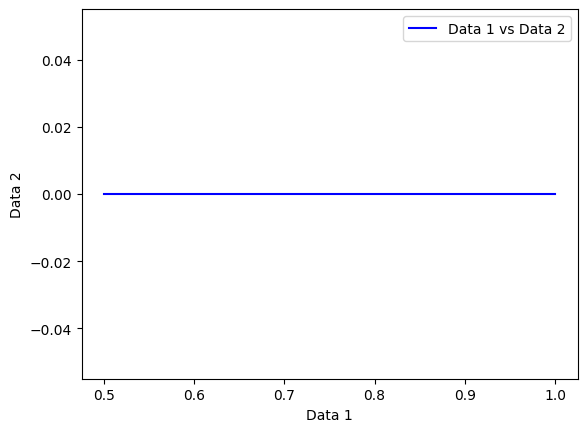

In [26]:
# Set the threshold value
data2=[]
data1=[]
start = 0.5
end = 1.0
step = 0.01

for t in np.arange(start, end + step, step):
  data1.append(t)
  threshold = t

  # Get the company names from the column names of the correlation matrix
  company_names = correlation_matrix.columns.tolist()

  # Create an empty list to store the edges
  edges = []

  # Iterate over the correlation matrix and extract the edges based on the threshold
  for i in range(len(company_names)):
      for j in range(i + 1, len(company_names)):
          from_edge = company_names[i]
          to_edge = company_names[j]
          weight = correlation_matrix.iloc[i, j]
          if abs(weight) >= threshold:
              edges.append([from_edge, to_edge, weight])
  x= len(edges)/(483*482)
  data2.append(x)
plt.plot(data1, data2, label='Data 1 vs Data 2', color='blue')

# Add labels for the x and y axes
plt.xlabel('Data 1')
plt.ylabel('Data 2')

# Add a legend
plt.legend()
plt.show()
# Create a DataFrame from the edges list
#edge_list = pd.DataFrame(edges, columns=['Source', 'Target', 'Weight'])

# Export the edge list as a CSV file
#edge_list.to_csv('corr_edge_list.csv', index=False)

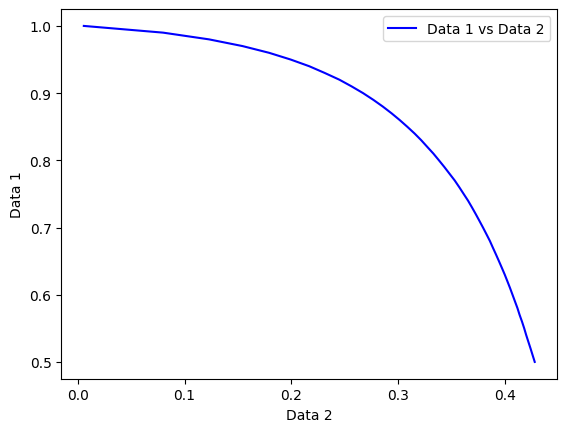

In [ ]:
plt.plot(data2, data1, label='Data 1 vs Data 2', color='blue')

# Add labels for the x and y axes
plt.xlabel('Data 2')
plt.ylabel('Data 1')

# Add a legend
plt.legend()
plt.show()

In [ ]:
!pip install --upgrade kneed



The elbow point is at x = 0.5


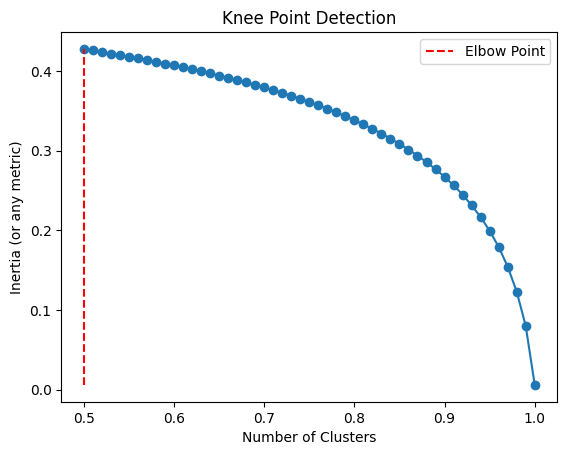

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from kneed import KneeLocator

# Generate example data (you should replace this with your own data)
x=data1
y=data2
# Plot the data
plt.plot(x, y, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia (or any metric)")
plt.title("Knee Point Detection")

# Find the knee point
kneedle = KneeLocator(x, y, curve="convex", direction="decreasing")

# Get the x-axis value corresponding to the knee point
knee_x = kneedle.elbow
print("The elbow point is at x =", knee_x)

# Plot the knee point on the graph
plt.vlines(x=knee_x, ymin=min(y), ymax=max(y), linestyles='dashed', colors='red', label='Elbow Point')

# Show the plot
plt.legend()
plt.show()

In [ ]:
# Set the threshold value
threshold = 0.95

  # Get the company names from the column names of the correlation matrix
company_names = correlation_matrix.columns.tolist()

  # Create an empty list to store the edges
edges = []

  # Iterate over the correlation matrix and extract the edges based on the threshold
for i in range(len(company_names)):
  for j in range(i + 1, len(company_names)):
    from_edge = company_names[i]
    to_edge = company_names[j]
    weight = correlation_matrix.iloc[i, j]
    if abs(weight) >= threshold:
      edges.append([from_edge, to_edge, weight])
# Create a DataFrame from the edges list
edge_list = pd.DataFrame(edges, columns=['Source', 'Target', 'Weight'])

# Export the edge list as a CSV file
edge_list.to_csv('corr_95_edge_list.csv', index=False)

In [ ]:
file_path = 'correlation_matrix.gexf'

# Use the to_excel function to save the DataFrame to an Excel file
correlation_matrix.to_excel(file_path, index=False)

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix.astype(float), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
#len(companies_to_plot)
len(correlation_table)

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Assuming you have already loaded your data and defined companies_to_plot and correlation_table

for k in range(1, 53):
    # Get the correlation matrix for week k
    if(len(correlation_table[k-1])==0):
      continue
    correlation_matrix = correlation_table[k-1].corr()

    # Create a graph using NetworkX
    G = nx.Graph()

    # Add nodes (companies) to the graph
    for company in companies_week[k-1]:
        G.add_node(company)

    # Add weighted edges to the graph based on the correlation values
    for i in range(len(companies_week[k-1])):
        for j in range(i + 1, len(companies_week[k-1])):
            correlation = correlation_matrix.iloc[i, j]  # Adjusted indexing here
            G.add_edge(companies_week[k-1][i], companies_week[k-1][j], weight=correlation)

    # Draw the graph
    plt.figure(figsize=(10, 10))
    pos = nx.circular_layout(G)  # You can try other layout algorithms
    nx.draw(G, pos, with_labels=True, node_size=1000, node_color='lightblue', font_size=10, font_weight='bold')
    edge_labels = {(i, j): f'{G[i][j]["weight"]:.2f}' for i, j in G.edges()}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    plt.title(f'Correlation Network Based on Trading Volume for week {k}')
    plt.show()


In [ ]:
import numpy as np
x1=np.array(data["close"])
x2=np.array(data["open"])
print(np.correlate(x1,x2))

[1.01377851e+10]
